We now evaluate the models. We start by comparing the counts of false positives to false negatives for each model, but now they are evaluated on the same continuous day sample of daily living.

In [9]:
import sys
import os
import torch

sys.path.append(os.path.abspath('..')) #so we can import for the dir above

from SimpleCNN import SimpleCNN
from eval_in_time_domain import eval_in_time_domain

In [10]:
RECODING_TO_EVAL_ON = '/home/kuba/Documents/data/raw/kuba_watch_data/2024-07-10_06_42_46'
PATH_TO_BOUT_DIR = '/home/kuba/Documents/data/raw/listerine/3_final'


WINDOW_SIZE = 800
STRIDE = 50
CONFIDANCE_THRESHOLD = 0.8
OVERLAP_THRESHOLD = 0.45
MIN_BOUT_LEN = 400
NUM_BOUT_TO_SAMP = 20
DEVICE = 'cuda:0'

We know the results from model00 so we will not re-eval and jsut eval on our new model with 9% macro f1 !

In [11]:
# #load model00
# model00_path = '/home/kuba/projects/medication-taking-data/new_start/week02/00_no_movment/94f1_with_filter_noMovmets.pth'
# model = RegNet()
# model.load_state_dict(torch.load(model00_path))

# #get false postive count

# TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
#                                             confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
#                                             num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)


WARNING we will sample bouts from all participants there will be data leakage, unless you specify who not to sample from
Bout shape - Acc: 549, Gyro: 549
Bout shape - Acc: 1203, Gyro: 1203
Bout shape - Acc: 414, Gyro: 414
Bout shape - Acc: 599, Gyro: 599
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 418, Gyro: 418
Bout shape - Acc: 1389, Gyro: 1389
Bout shape - Acc: 800, Gyro: 800
Bout shape - Acc: 781, Gyro: 781
Bout shape - Acc: 628, Gyro: 628
Bout shape - Acc: 670, Gyro: 670
Bout shape - Acc: 497, Gyro: 497
Bout shape - Acc: 507, Gyro: 507
Bout shape - Acc: 469, Gyro: 469
Bout shape - Acc: 645, Gyro: 645
Bout shape - Acc: 550, Gyro: 550
Bout shape - Acc: 454, Gyro: 454
Bout shape - Acc: 466, Gyro: 466
Bout shape - Acc: 745, Gyro: 745
Bout shape - Acc: 424, Gyro: 424
The recording partitioned into windows has shape of: torch.Size([51904, 6, 800])


/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


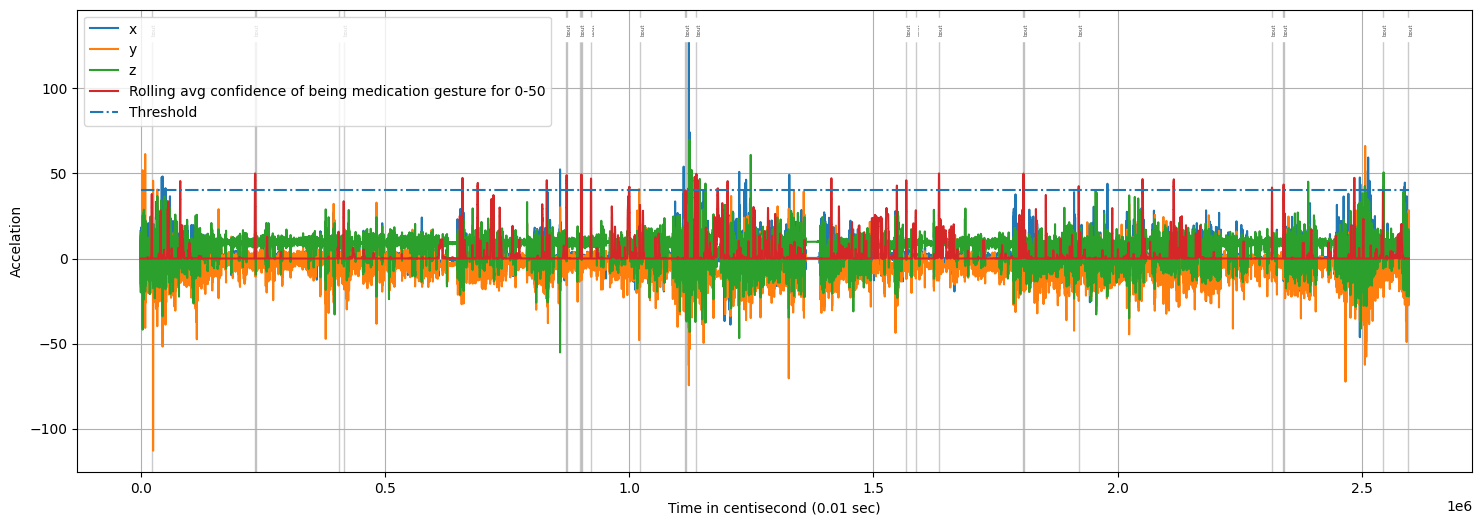

There are 151 FP's of 51904 total windows (FP is -> confidance over: 0.8 and less that 45.0% overlap with a real bout)
FP's are at rate of 0.29%
Fn's are at rate of 0.4373%
Normalized on True


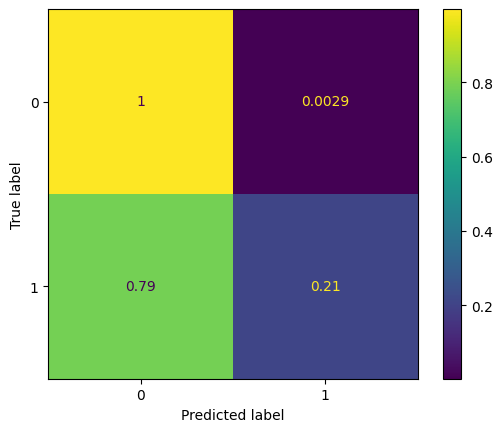

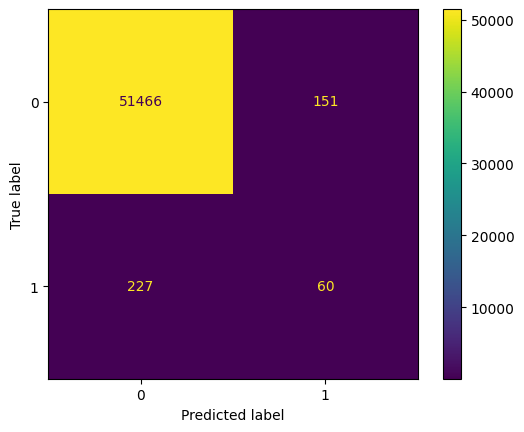

In [12]:
#load model01
model01_path = '/home/kuba/projects/medication-taking-data/new_start/week03/01_augment_loss_weights/92f1_Augmented_loss_weights_simpcnn_09posweight.pth'
model = SimpleCNN()
model.load_state_dict(torch.load(model01_path))
#get false postive count
TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
                                            confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
                                            num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)

LETS GO MODEL IS EVEN BETTER!